In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [4]:
df = pd.read_csv('labeled_data.csv')

In [5]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [7]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


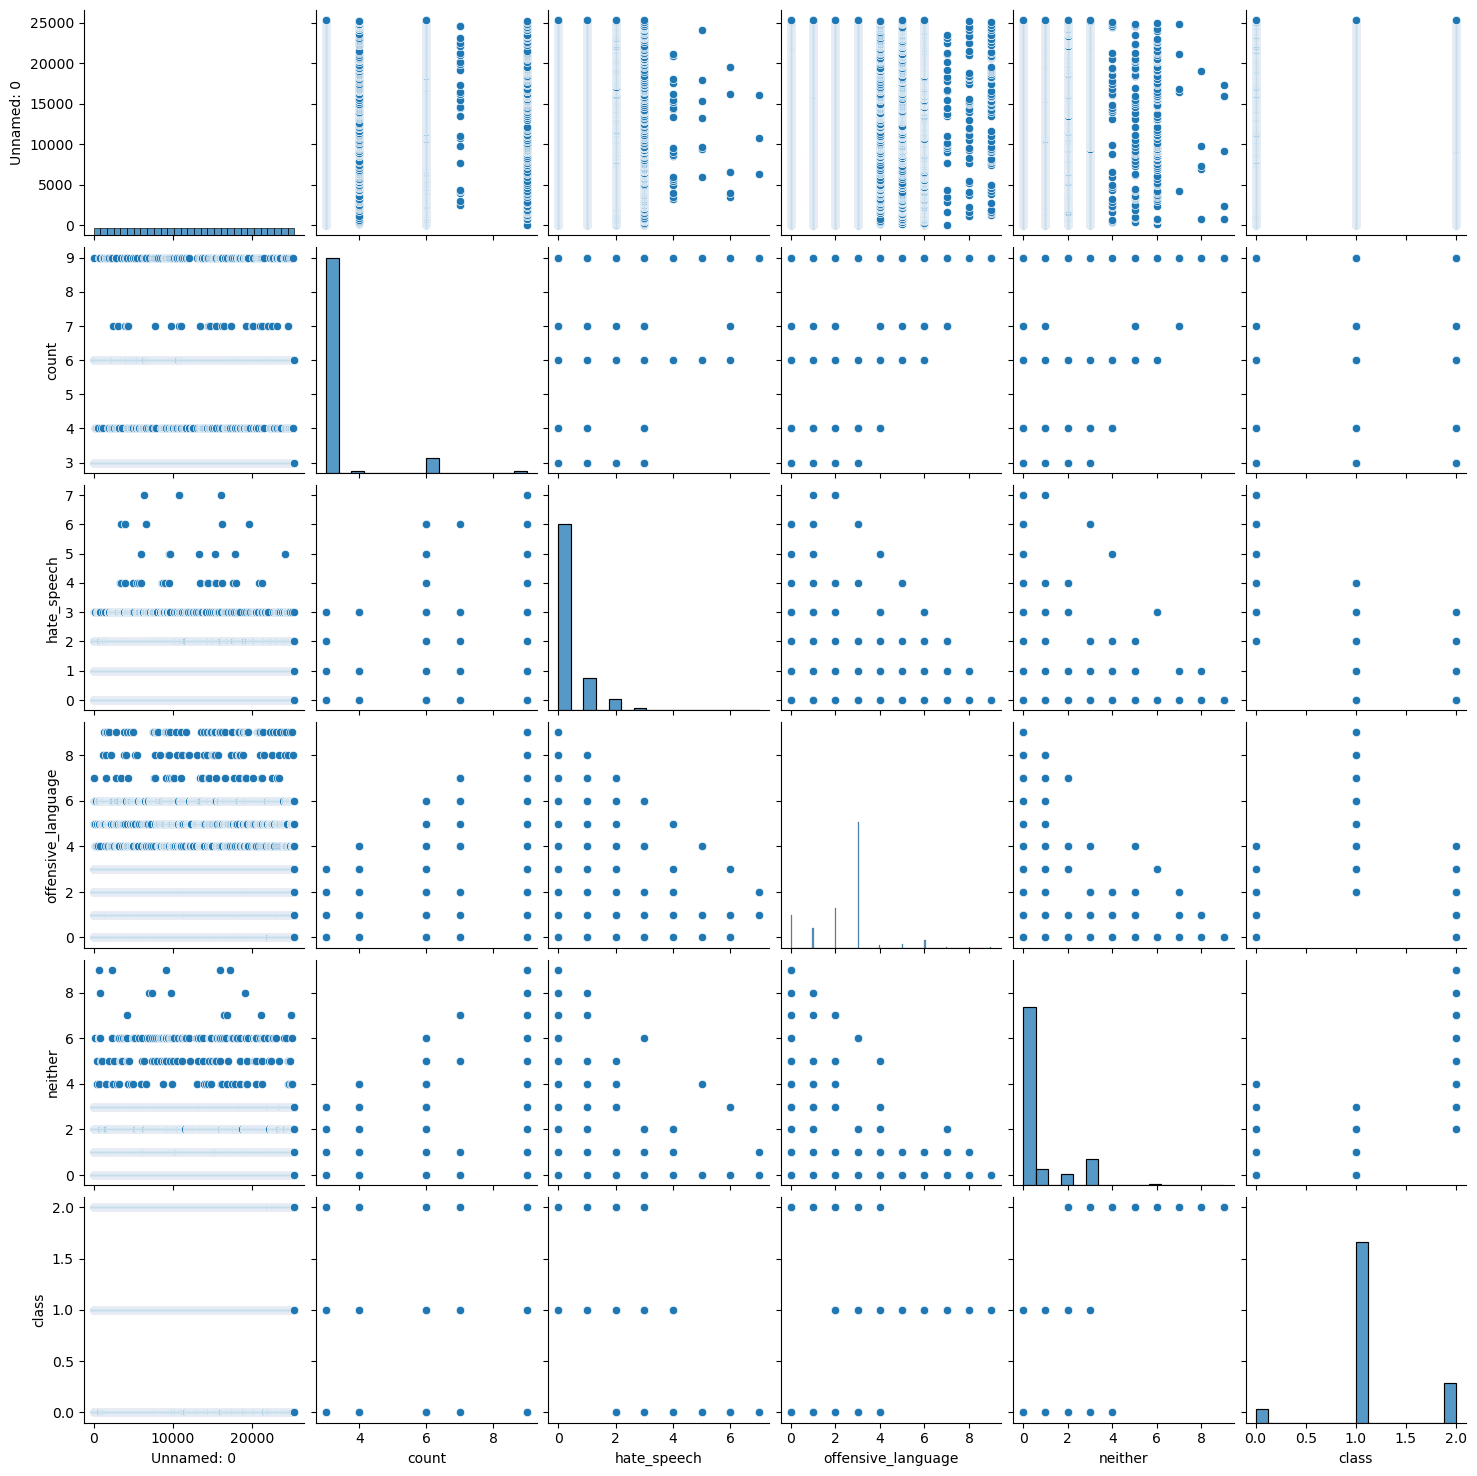

In [9]:
sns.pairplot(df)

In [10]:
def nlp_cleaning(text_corpus):
    stopwrds = nltk.corpus.stopwords.words('english')
    stopwrds.append('rt')
    tweets = []
    ps = PorterStemmer()
    i = 0
    for tweet in text_corpus:
        no_num = re.sub('[^a-zA-Z]', ' ', tweet)
        lower_case = no_num.lower()
        listofwords = lower_case.split()
        after_stemming = [ps.stem(word) for word in listofwords if word not in stopwrds]
        review = ' '.join(after_stemming)
        tweets.append(review)
    return tweets
        
cleaned_text = nlp_cleaning(df['tweet'])

In [11]:
cleaned_text[:10]

['mayasolov woman complain clean hous amp man alway take trash',
 'mleew boy dat cold tyga dwn bad cuffin dat hoe st place',
 'urkindofbrand dawg sbabi life ever fuck bitch start cri confus shit',
 'c g anderson viva base look like tranni',
 'shenikarobert shit hear might true might faker bitch told ya',
 'madison x shit blow claim faith somebodi still fuck hoe',
 'brighterday sit hate anoth bitch got much shit go',
 'selfiequeenbri caus tire big bitch come us skinni girl',
 'amp might get ya bitch back amp that',
 'rhythmixx hobbi includ fight mariam bitch']

In [12]:
len(cleaned_text)

24783

Vectorization of the text using bag of words

In [13]:
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(cleaned_text).toarray()

In [14]:
y = pd.get_dummies(df['class'])
y = y.values
y

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
model = Sequential()

model.add(Dense(5000, activation='relu', input_shape=(5000, )))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              25005000  
                                                                 
 dropout (Dropout)           (None, 5000)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               2560512   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                1

In [18]:
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

C:\Users\abhin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
model.fit(x=X_train, y=y_train, batch_size=64, validation_data=(X_test, y_test), epochs=15, verbose=2)

Epoch 1/15
291/291 - 16s - loss: 0.3839 - accuracy: 0.8776 - val_loss: 0.3124 - val_accuracy: 0.8995 - 16s/epoch - 54ms/step
Epoch 2/15
291/291 - 12s - loss: 0.2268 - accuracy: 0.9190 - val_loss: 0.3423 - val_accuracy: 0.8938 - 12s/epoch - 40ms/step
Epoch 3/15
291/291 - 9s - loss: 0.1385 - accuracy: 0.9464 - val_loss: 0.5041 - val_accuracy: 0.8912 - 9s/epoch - 32ms/step
Epoch 4/15
291/291 - 13s - loss: 0.0781 - accuracy: 0.9709 - val_loss: 0.7408 - val_accuracy: 0.8835 - 13s/epoch - 43ms/step
Epoch 5/15
291/291 - 12s - loss: 0.0513 - accuracy: 0.9820 - val_loss: 0.9458 - val_accuracy: 0.8869 - 12s/epoch - 40ms/step
Epoch 6/15
291/291 - 11s - loss: 0.0344 - accuracy: 0.9882 - val_loss: 1.0030 - val_accuracy: 0.8893 - 11s/epoch - 39ms/step
Epoch 7/15
291/291 - 12s - loss: 0.0283 - accuracy: 0.9909 - val_loss: 1.1600 - val_accuracy: 0.8890 - 12s/epoch - 40ms/step
Epoch 8/15
291/291 - 12s - loss: 0.0203 - accuracy: 0.9928 - val_loss: 1.5830 - val_accuracy: 0.8815 - 12s/epoch - 42ms/step
Ep